# Predicting Car Prices using Multiple Linear Regression model (MLR)
- The goal is to predict the price of used cars depending on features of a given car
- **Features**: 
    - Brand, Body, Mileage, EngineV, Engine Type, Registration, Year
- several features must have been transformed or otherwise cleaned to match the assumptions of MLR or be suitable for this type of modelling
    - the reasons and methods of transformations are described within the notebook
- Data were acquired throug the course Machine Learning in Python by 365DataScience
- Model Evaluation:
    - **R-Squared** ________________ 0.890839
    - **R-Squared Adjusted** _____ 0.889878
    - **Mean Absolute Error** ____ 3958.59

## Importing relevant libraries
    - I am going to use scikit-learn to perform MLR

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set()

## Loading raw data

In [2]:
raw = pd.read_csv('C:/Users/tomas/OneDrive/Plocha/CarPricePredictions/CarPricePrediction.csv')
df = raw.copy()

df.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


## Preprocessing
- performing univariate analysis to see whether there are some problems with individual features that can be fixed before MLR

### Exploring the descriptive statistics of the variables
- from the descriptive statistics we can see that there are problems with outliers in the majority of numerical variables
- another issue is with the Model feature which has high cardinality (too many unique values for a categorical variable)
    - Model has 312 groups which would be too inefficient to implement for MLR

In [3]:
df.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


### Dealing with missing values
    - Price and EngineV variables have several missing values which we need to eliminate or fill in
    - since the missing values account for lees than 5% of the data, we can safely drop them

In [4]:
df.isnull().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
Model             0
dtype: int64

In [5]:
df = df.dropna(axis=0)

In [6]:
df.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4025,4025.000000,4025,4025.000000,4025.000000,4025,4025,4025.000000,4025
unique,7,NaN,6,NaN,NaN,4,2,NaN,306
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,880,NaN,1534,NaN,NaN,1861,3654,NaN,188
mean,NaN,19552.308065,NaN,163.572174,2.764586,NaN,NaN,2006.379627,NaN
std,NaN,25815.734988,NaN,103.394703,4.935941,NaN,NaN,6.695595,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,90.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000,NaN
75%,NaN,21900.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


### Exploring the Probability Distribution Functions (PDFs)
    - PDF often helps us to spot anomalies and decide whether we want to transform a feature
    - we can plot PDFs by using histograms

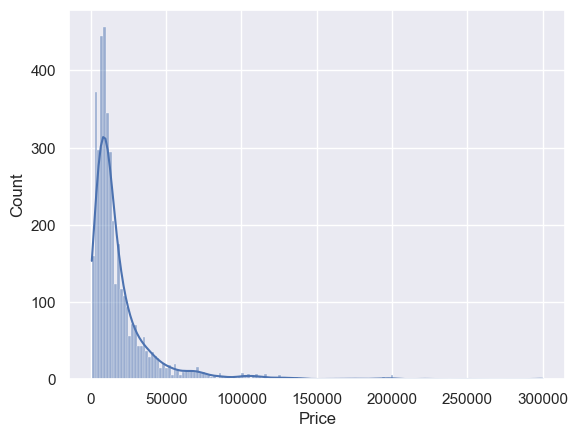

In [7]:
sns.histplot(df['Price'], kde=True);

    - Price is not normally distributed and has a problem with outliers

#### Dealing with outliers
    - eliminating the highest 1% values in Price
    - from the chart we can see that the outliers are lying on the right side, that is why we are dropping the highest values and not the lowest

In [8]:
q = df['Price'].quantile(0.99)

df = df[df['Price']<q]

df['Price'].describe()

count      3984.000000
mean      17837.117460
std       18976.268315
min         600.000000
25%        6980.000000
50%       11400.000000
75%       21000.000000
max      129222.000000
Name: Price, dtype: float64

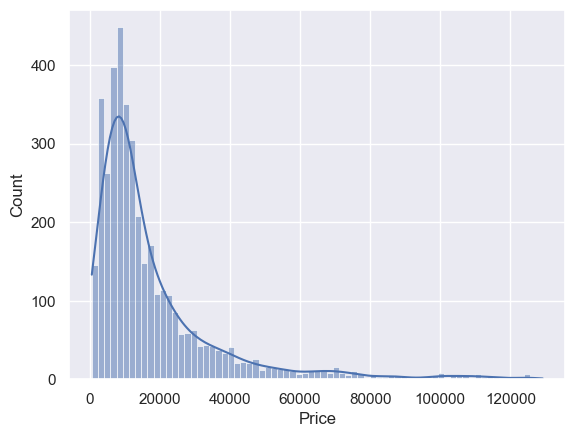

In [9]:
sns.histplot(df['Price'], kde=True);

    - the histogram of Price looks much better but it is still skewed
        - it is because eliminating outliers does not change the distribution

In [10]:
df['Price'].skew()

2.652472167087331

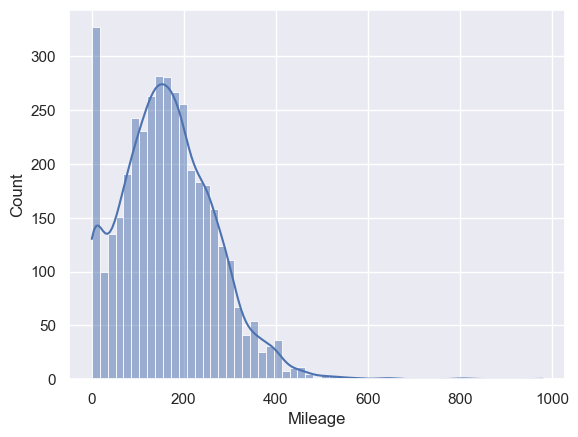

In [11]:
sns.histplot(df['Mileage'], kde=True);

    - Mileage has the same problem as Price
    - we eliminate the top 1% of the highest values

In [12]:
q = df['Mileage'].quantile(0.99)
df = df[df['Mileage']<q]

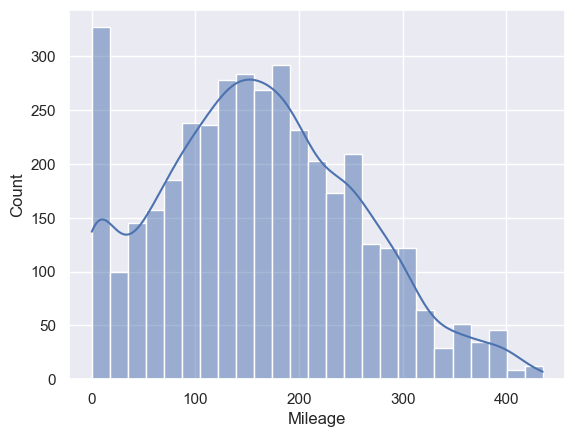

In [13]:
sns.histplot(df['Mileage'], kde=True);

    - Mileage histogram improved and it is not skewed
        - a variable is skewed if the value of skewness is less than -1 or higher than +1

In [14]:
df['Mileage'].skew()

0.2651091789005931

In [15]:
df['Mileage'].describe()

count    3944.000000
mean      161.484026
std        96.027108
min         0.000000
25%        92.000000
50%       158.000000
75%       230.000000
max       435.000000
Name: Mileage, dtype: float64

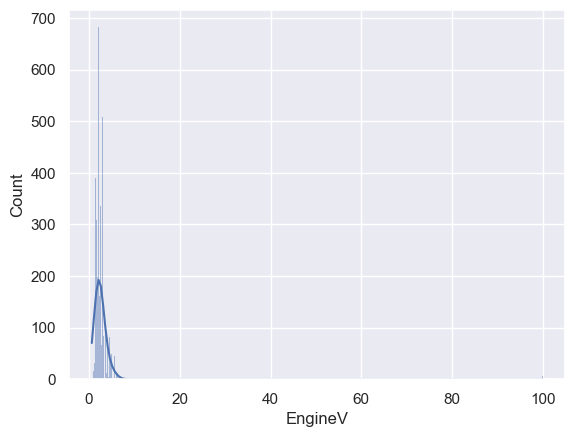

In [16]:
sns.histplot(df['EngineV'], kde=True);

    - Enginev has several data points that do not make sense, since they are too high for a car engine value
    - Google search found out that car engine volumes are always bellow 6.5l
        - we can then remove the entries that are above this value

In [17]:
df = df[df['EngineV']<6.5]

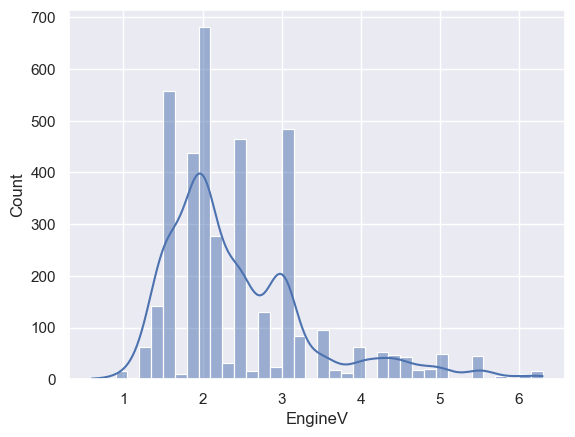

In [18]:
sns.histplot(df['EngineV'], kde=True);

    - the histogram for EngineV improved but it is still a little skewed
    - based on the chart, it might be better to treat EngineV as a categorical variable to prevent Python to treat it as a discrete numerical variable

In [19]:
df['EngineV'].skew()

1.4901525808529255

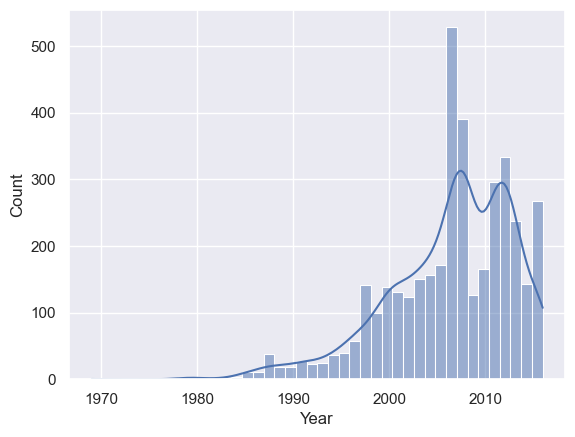

In [20]:
sns.histplot(df['Year'], kde=True);

    - Year is skewed to the left so this time we need to drop the lowest 1% values

In [21]:
q = df['Year'].quantile(0.01)
df = df[df['Year']>q]

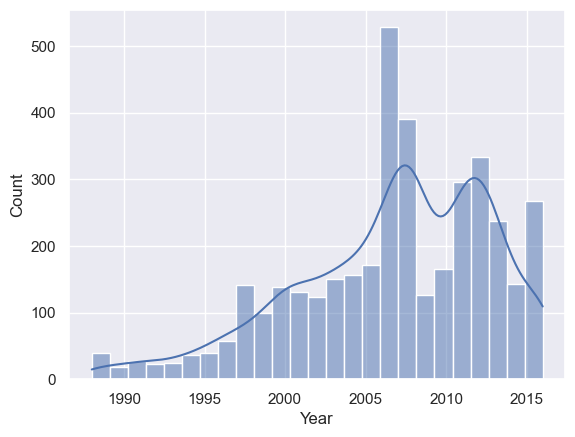

In [22]:
sns.histplot(df['Year'], kde=True);

    - Year now looks good and it is not skewed

In [23]:
df['Year'].skew()

-0.7187937721726742

#### Transforming 'EngineV' to be a categorical variable
    - we can use binning method for this transformation
    - we will create intervals (bins) based on quantilles to create a categorical variable with 4 groups
    - in the end we create a new varible 'bins_EngineV' representing the result of the transformation

In [24]:
df['EngineV'].describe()

count    3867.000000
mean        2.450440
std         0.949366
min         0.600000
25%         1.800000
50%         2.200000
75%         3.000000
max         6.300000
Name: EngineV, dtype: float64

<AxesSubplot:>

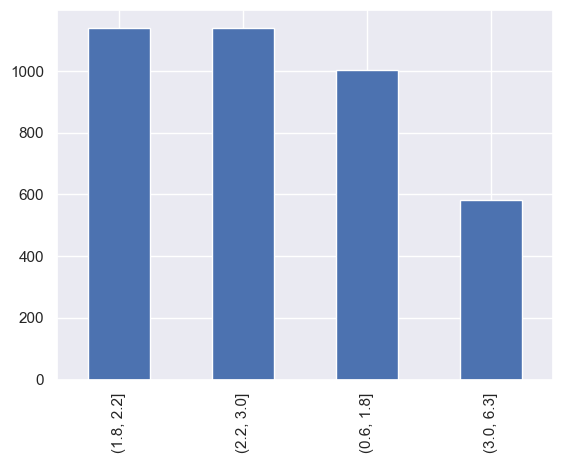

In [25]:
bins = [0.6, 1.8, 2.2, 3, 6.3]
bins_EngineV = pd.cut(df['EngineV'], bins)
bins_EngineV.value_counts().plot(kind='bar')

In [26]:
df['bins_EngineV'] = bins_EngineV

#### Fixing wrong indexing
- because we removed observations, we need to return indices to the proper zero-based indexing 

In [27]:
df = df.reset_index(drop=True)

In [28]:
df.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model,bins_EngineV
count,3867,3867.000000,3867,3867.000000,3867.000000,3867,3867,3867.000000,3867,3866
unique,7,NaN,6,NaN,NaN,4,2,NaN,291,4
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class,"(1.8, 2.2]"
freq,848,NaN,1467,NaN,NaN,1807,3505,NaN,181,1141
mean,NaN,18194.455679,NaN,160.542539,2.450440,NaN,NaN,2006.709853,NaN,NaN
std,NaN,19085.855165,NaN,95.633291,0.949366,NaN,NaN,6.103870,NaN,NaN
min,NaN,800.000000,NaN,0.000000,0.600000,NaN,NaN,1988.000000,NaN,NaN
25%,NaN,7200.000000,NaN,91.000000,1.800000,NaN,NaN,2003.000000,NaN,NaN
50%,NaN,11700.000000,NaN,157.000000,2.200000,NaN,NaN,2008.000000,NaN,NaN
75%,NaN,21700.000000,NaN,225.000000,3.000000,NaN,NaN,2012.000000,NaN,NaN


## Checking OLS assumptions
    - OLS stands for Ordinary Least Squares and it is the method we will be using for the regression
    - we do not need to take special attention to the categorical variables as they will be converted to dummies
        - the only issue is with Model which has high cardinality

### 1st Assumption: Linearity

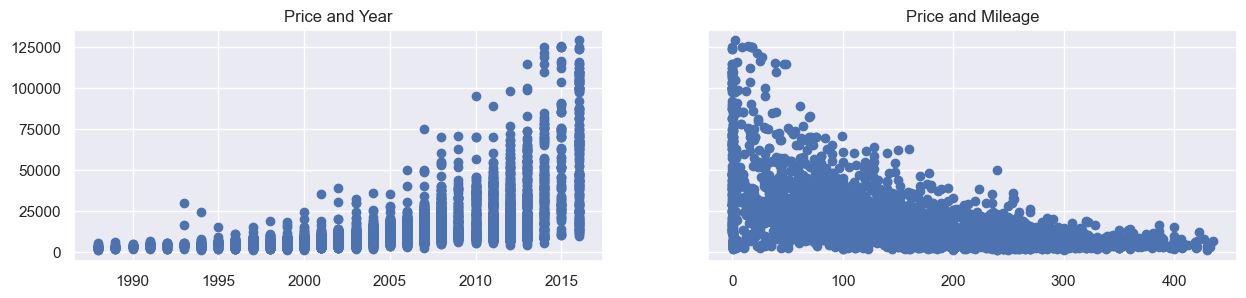

In [29]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize =(15,3)) #sharey -> share 'Price' as y
ax1.scatter(df['Year'],df['Price'])
ax1.set_title('Price and Year')
ax2.scatter(df['Mileage'],df['Price'])
ax2.set_title('Price and Mileage')

plt.show()

    - both numerical features do not exhibit linearity patterns
        - we need to transform one or more variables to be able to run MLR

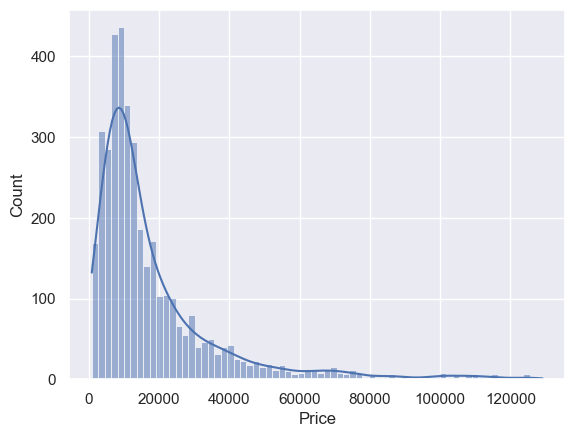

In [30]:
sns.histplot(df['Price'], kde=True);

- Price is exponentially distributed which is why the relationships with numerical features are not linear
    - since Price is exponentially distributed, a good transformation is a log transformation

##### Log transformation of Price
- log transformations are especially useful when facing exponential relationships

In [31]:
log_price = np.log(df['Price'])

df['log_price'] = log_price
df.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model,bins_EngineV,log_price
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320,"(1.8, 2.2]",8.342840
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212,"(2.2, 3.0]",8.974618
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500,"(3.0, 6.3]",9.495519
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7,"(3.0, 6.3]",10.043249
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4,"(1.8, 2.2]",9.814656


    - I stored the transformed price into the variable 'log_price' and will use this one for MLR

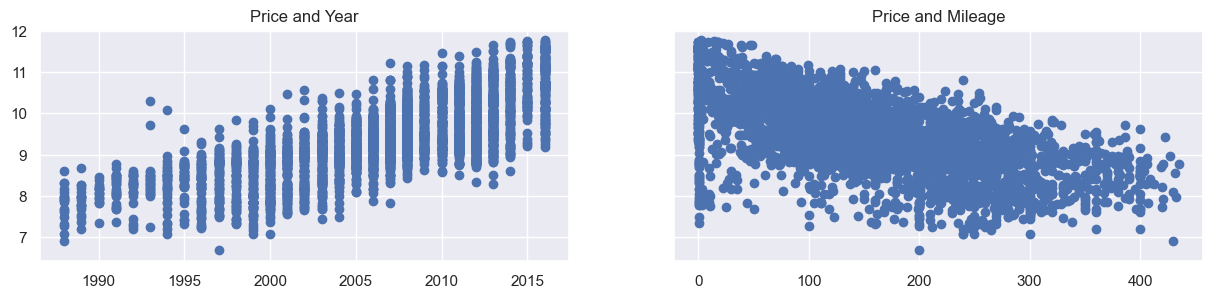

In [32]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize =(15,3)) #sharey -> share 'Price' as y
ax1.scatter(df['Year'], df['log_price'])
ax1.set_title('Price and Year')
ax2.scatter(df['Mileage'], df['log_price'])
ax2.set_title('Price and Mileage')

plt.show()

    - now we can see linear relationships

### 2nd Assumption: Normality and Homoscedasticity
- Normality is assumed for a big sample
    - due to Central Limit Theorem
- Homoscedasticity - generally holds as we can see from the scatter plots (because we already implemented a log transformation for y)
    - log transformation is the most common fix for heteroscedasticity
    - alternatively, we could perform White or/and Breusch-Pagan test to check for heteroscedasticity  

### 3rd Assumption: Autocorrelation
- the observations that we have do not come from time series data or panel data
- each row comes from a different customer, so there is no reason for the observations to be dependent on each other and therefore there should not be autocorrelation

### 4th Assumption: Multicollinearity
- the best way to check for multicollinearity is through VIF (Variance Inflation Factor)
- VIF = 1 - no multicollinearity
- 1 < VIF < 5 - perfectly ok
- VIF > 5/6/10 - unacceptable
    - there is no consensus about which value of VIF is too high
- I am using statsmodels to produce VIF 

In [33]:
df.head()

# we can expect a correlation between Year and Mileage

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model,bins_EngineV,log_price
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320,"(1.8, 2.2]",8.342840
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212,"(2.2, 3.0]",8.974618
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500,"(3.0, 6.3]",9.495519
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7,"(3.0, 6.3]",10.043249
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4,"(1.8, 2.2]",9.814656


In [34]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

variables = df[['Mileage', 'Year']]

vif = pd.DataFrame()
 
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]

vif["Features"] = variables.columns

In [35]:
vif

,VIF,Features
0,3.791089,Mileage
1,3.791089,Year


    - Both numerical variables are fine since VIF is between 1 and 5

## Create dummy variables

#### Aggregating 'Model'
- 'Model' has 312 unique values making it a feature with high cardinality
- we can reduce the cardinality by setting a threshold and aggregate the values
    - we will keep the unique categories that fall within the threshold and the rest will be labeled as 'Other'
- I used the code by Raj Sangani for this operation
    - source: https://towardsdatascience.com/dealing-with-features-that-have-high-cardinality-1c9212d7ff1b

In [36]:
from collections import Counter
def cumulatively_categorise(column,threshold=0.25,return_categories_list=True):
  #Find the threshold value using the percentage and number of instances in the column
  threshold_value=int(threshold*len(column))
  #Initialise an empty list for our new minimised categories
  categories_list=[]
  #Initialise a variable to calculate the sum of frequencies
  s=0
  #Create a counter dictionary of the form unique_value: frequency
  counts=Counter(column)

  #Loop through the category name and its corresponding frequency after sorting the categories by descending order of frequency
  for i,j in counts.most_common():
    #Add the frequency to the global sum
    s+=dict(counts)[i]
    #Append the category name to the list
    categories_list.append(i)
    #Check if the global sum has reached the threshold value, if so break the loop
    if s>=threshold_value:
      break
  #Append the category Other to the list
  categories_list.append('Other')

  #Replace all instances not in our new categories by Other  
  new_column=column.apply(lambda x: x if x in categories_list else 'Other')

  #Return transformed column and unique values if return_categories=True
  if(return_categories_list):
    return new_column,categories_list
  #Return only the transformed column if return_categories=False
  else:
    return new_column


#Call the function with a default threshold of 75%
transformed_column,new_category_list=cumulatively_categorise(df['Model'],return_categories_list=True)

In [37]:
transformed_column.value_counts()

Other      2900
E-Class     181
Vito        154
A6          153
Kangoo      132
Camry       127
X5          110
Caddy       110
Name: Model, dtype: int64

    - now Model only has 8 categories from the original 320 and we can use it for MLR
    - I store this transformation to the variable aggreg_model

In [38]:
df['aggreg_model'] = transformed_column
df.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model,bins_EngineV,log_price,aggreg_model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320,"(1.8, 2.2]",8.342840,Other
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212,"(2.2, 3.0]",8.974618,Other
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500,"(3.0, 6.3]",9.495519,Other
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7,"(3.0, 6.3]",10.043249,Other
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4,"(1.8, 2.2]",9.814656,Other


In [39]:
df = df.drop(['Price', 'EngineV', 'Model'], axis=1)

    - dropping the original variables that have been transformed

In [40]:
df.describe(include='all')

,Brand,Body,Mileage,Engine Type,Registration,Year,bins_EngineV,log_price,aggreg_model
count,3867,3867,3867.000000,3867,3867,3867.000000,3866,3867.000000,3867
unique,7,6,NaN,4,2,NaN,4,NaN,8
top,Volkswagen,sedan,NaN,Diesel,yes,NaN,"(1.8, 2.2]",NaN,Other
freq,848,1467,NaN,1807,3505,NaN,1141,NaN,2900
mean,NaN,NaN,160.542539,NaN,NaN,2006.709853,NaN,9.415703,NaN
std,NaN,NaN,95.633291,NaN,NaN,6.103870,NaN,0.876616,NaN
min,NaN,NaN,0.000000,NaN,NaN,1988.000000,NaN,6.684612,NaN
25%,NaN,NaN,91.000000,NaN,NaN,2003.000000,NaN,8.881836,NaN
50%,NaN,NaN,157.000000,NaN,NaN,2008.000000,NaN,9.367344,NaN
75%,NaN,NaN,225.000000,NaN,NaN,2012.000000,NaN,9.985068,NaN


#### Creating dummies

In [41]:
df = pd.get_dummies(df, drop_first=True)

In [42]:
df.head()

,Mileage,Year,log_price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,...,"bins_EngineV_(1.8, 2.2]","bins_EngineV_(2.2, 3.0]","bins_EngineV_(3.0, 6.3]",aggreg_model_Caddy,aggreg_model_Camry,aggreg_model_E-Class,aggreg_model_Kangoo,aggreg_model_Other,aggreg_model_Vito,aggreg_model_X5
0,277,1991,8.342840,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
1,427,1999,8.974618,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
2,358,2003,9.495519,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
3,240,2007,10.043249,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
4,120,2011,9.814656,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,1,0,0


In [43]:
df.shape

(3867, 28)

    - in total now we have 28 columns, that is why it is beneficial not to have features with high cardinality
        - otherwise the number of columns would be much higher which would affect the performance

### Rearranging the data frame
- placing target in the beginning, followed with numerical variables and dummies in the end

In [44]:
df.columns.values

array(['Mileage', 'Year', 'log_price', 'Brand_BMW', 'Brand_Mercedes-Benz',
       'Brand_Mitsubishi', 'Brand_Renault', 'Brand_Toyota',
       'Brand_Volkswagen', 'Body_hatch', 'Body_other', 'Body_sedan',
       'Body_vagon', 'Body_van', 'Engine Type_Gas', 'Engine Type_Other',
       'Engine Type_Petrol', 'Registration_yes',
       'bins_EngineV_(1.8, 2.2]', 'bins_EngineV_(2.2, 3.0]',
       'bins_EngineV_(3.0, 6.3]', 'aggreg_model_Caddy',
       'aggreg_model_Camry', 'aggreg_model_E-Class',
       'aggreg_model_Kangoo', 'aggreg_model_Other', 'aggreg_model_Vito',
       'aggreg_model_X5'], dtype=object)

In [45]:
cols = ['log_price', 'Mileage', 'Year', 'Brand_BMW', 'Brand_Mercedes-Benz',
       'Brand_Mitsubishi', 'Brand_Renault', 'Brand_Toyota',
       'Brand_Volkswagen', 'Body_hatch', 'Body_other', 'Body_sedan',
       'Body_vagon', 'Body_van', 'Engine Type_Gas', 'Engine Type_Other',
       'Engine Type_Petrol', 'Registration_yes',
       'bins_EngineV_(1.8, 2.2]', 'bins_EngineV_(2.2, 3.0]',
       'bins_EngineV_(3.0, 6.3]', 'aggreg_model_Caddy',
       'aggreg_model_Camry', 'aggreg_model_E-Class',
       'aggreg_model_Kangoo', 'aggreg_model_Other', 'aggreg_model_Vito',
       'aggreg_model_X5']

In [46]:
df = df[cols]
df.head()

,log_price,Mileage,Year,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,...,"bins_EngineV_(1.8, 2.2]","bins_EngineV_(2.2, 3.0]","bins_EngineV_(3.0, 6.3]",aggreg_model_Caddy,aggreg_model_Camry,aggreg_model_E-Class,aggreg_model_Kangoo,aggreg_model_Other,aggreg_model_Vito,aggreg_model_X5
0,8.342840,277,1991,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
1,8.974618,427,1999,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
2,9.495519,358,2003,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
3,10.043249,240,2007,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
4,9.814656,120,2011,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,1,0,0


    - now we have everything ready for MLR

## Linear regression model

### Declare the inputs and the targets

In [47]:
targets = df['log_price']

inputs = df.drop(['log_price'],axis=1)

### Scaling the data
- it is not usually recommended to standardize dummy variables
    - in ML, we do not care that much as scaling has no effect on the predictive power of dummies

In [48]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(inputs)

StandardScaler()

In [49]:
inputs_scaled = scaler.transform(inputs)

### Train Test Split
- splitting the data into train and test data
- this is the fundamental part of Machine Learning that prevents overfitting
    - we train the model on one dataset and test it on the other dataset that the model have not seen before

In [50]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(inputs_scaled, targets, test_size=0.2, random_state=42)

### Creating the regression

In [51]:
reg = LinearRegression()

reg.fit(x_train,y_train)

LinearRegression()

In [52]:
y_hat = reg.predict(x_train)

#### 1st check - Scatterplot of train target and predictions
    - it allows us to see the relationship between actual values and predicted values by our model

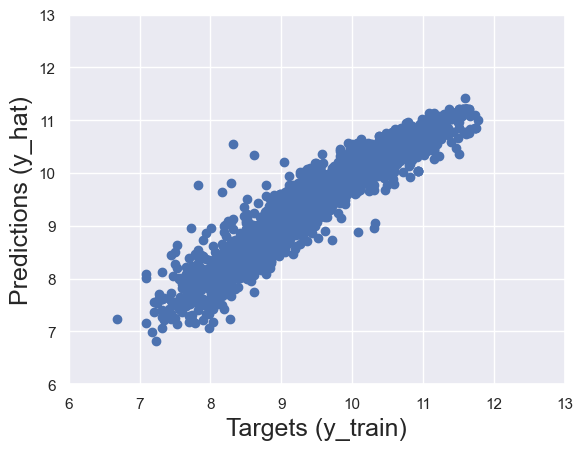

In [53]:
plt.scatter(y_train, y_hat)

plt.xlabel('Targets (y_train)',size=18)
plt.ylabel('Predictions (y_hat)',size=18)

plt.xlim(6,13) # assuring the same scales of axis
plt.ylim(6,13)
plt.show()

    - a perfect model would look like a straight line

#### 2nd check - Residual plot
    - we can see that the plot of residuals resembles symmetrical distribution

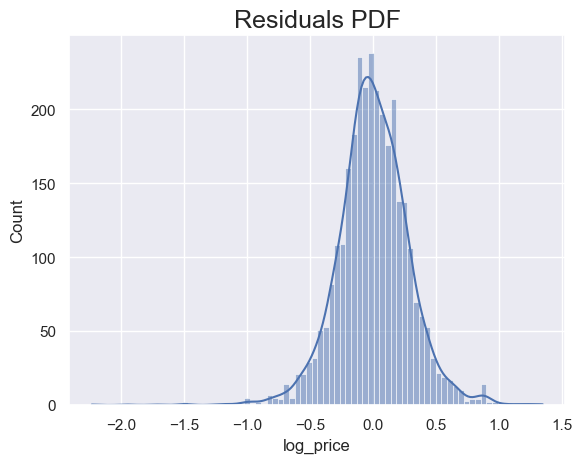

In [54]:
sns.histplot(y_train - y_hat, kde=True)

# Include a title
plt.title("Residuals PDF", size=18)

plt.show()

In [55]:
(y_train - y_hat).skew()

-0.31208282002059473

- we have a fairly symmetrical distribution

### R-squared
- R-squared is the most common method of measuring the quailty of the model
- it measures how well our features describe the dependent variable

In [66]:
r_squared = reg.score(x_train,y_train)
print(f'R-squared: {r_squared.round(2)*100}%')

R-squared: 89.0%


### R-squared Adjusted
- R-squared Adjusted penalises the model if we add a feature that does not help describe the dependent variable
    - we can use this measure to compare our models

In [69]:
r2 = reg.score(x_train, y_train)
n = x_train.shape[0]
p = x_train.shape[1]

adjusted_r2 = 1-(1-r2)*(n - 1)/(n-p-1)

print(f'R-squared Adjusted: {adjusted_r2.round(2)*100}%')

R-squared Adjusted: 89.0%


In [70]:
data = [['R-squared', r_squared], ['R-squared Adj', adjusted_r2]]

model_evaluation = pd.DataFrame(data, columns=['', ''])
model_evaluation


,,
0,R-squared,0.890839
1,R-squared Adj,0.889878


### Finding the weights and bias
- we can find the weights (coefficients) of individual features to see which features do not affect the model significantly
- we can then decide to drop some of such variables

##### Bias (Intercept)

In [71]:
reg.intercept_

9.416784279679318

##### Weights (Coefficients)

In [72]:
reg.coef_

array([-0.11461867,  0.51792312,  0.01653628,  0.03924828, -0.1532948 ,
       -0.21104032, -0.08312713, -0.12886096, -0.09103965, -0.0573786 ,
       -0.12435562, -0.08689577, -0.09100379, -0.03967845, -0.00933238,
       -0.05190414,  0.2662831 ,  0.06790737,  0.1555612 ,  0.19798151,
       -0.04868013, -0.00843533,  0.00249819, -0.03531753,  0.059475  ,
       -0.06281876,  0.01889496])

In [73]:
reg_summary = pd.DataFrame(data=(inputs.columns.values), columns=['Features'])
reg_summary['Weights'] = reg.coef_
reg_summary

,Features,Weights
0,Mileage,-0.114619
1,Year,0.517923
2,Brand_BMW,0.016536
3,Brand_Mercedes-Benz,0.039248
4,Brand_Mitsubishi,-0.153295
5,Brand_Renault,-0.211040
6,Brand_Toyota,-0.083127
7,Brand_Volkswagen,-0.128861
8,Body_hatch,-0.091040
9,Body_other,-0.057379


    - it is not possible to interpret the coefficients among each other

In [74]:
raw['Brand'].unique()

array(['BMW', 'Mercedes-Benz', 'Audi', 'Toyota', 'Renault', 'Volkswagen',
       'Mitsubishi'], dtype=object)

#### Weights interpretation
##### Constinuous variables
- a POSITIVE WIEGHT shows that as a feature increases in value, so do the log_price and Price respectively
- a NEGATIVE WEIGHT shows that as a feature increases in value, log_price and Price decrease
##### Dummy variables
- a POSITIVE WIEGHT shows that the respective category (ex. Brand) is more expensive than the benchamrk (Audi)
- a NEGATIVE WEIGHT shows that the respective category (ex. Brand) is less expensive than the benchamrk (Audi)
    - benchmark is the category within group that is not shown as a dummy (not visible in the reg_summary dataframe)

##### Notes
- the bigger the weight, the bigger the impact
- it does not make sense to compare continuous varibles with dummies

## Testing the model
- similarly to train data, we can check the scatterplot of actual values and predicted values of the test dataset

In [75]:
y_hat_test = reg.predict(x_test)

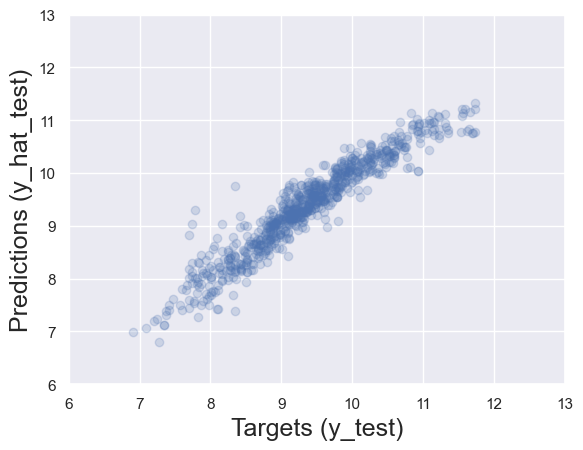

In [76]:
plt.scatter(y_test, y_hat_test, alpha=0.2)

plt.xlabel('Targets (y_test)',size=18)
plt.ylabel('Predictions (y_hat_test)',size=18)

plt.xlim(6,13)
plt.ylim(6,13)

plt.show()

### Manually comparing predictions
- to obtain the actual prices, we need to take the exponential of the 'log_price' because we previously used log transformation

In [77]:
df_pf = pd.DataFrame(np.exp(y_hat_test), columns=['Prediction'])
df_pf.head()

,Prediction
0,30533.846389
1,7080.857036
2,6425.562960
3,12722.605149
4,3942.870979


In [78]:
df_pf['Target'] = np.exp(y_test)
df_pf

,Prediction,Target
0,30533.846389,4200.0
1,7080.857036,NaN
2,6425.562960,NaN
3,12722.605149,NaN
4,3942.870979,NaN
...,...,...
769,4479.488048,NaN
770,9677.692763,NaN
771,4576.801465,NaN
772,29457.446486,NaN


    - there are many missing values which should not be there
    - we must reset the index to get correct results

In [79]:
y_test = y_test.reset_index(drop=True)

y_test.head()

0    9.966462
1    9.093807
2    8.086410
3    9.392662
4    8.594154
Name: log_price, dtype: float64

In [80]:
df_pf['Target'] = np.exp(y_test)
df_pf

,Prediction,Target
0,30533.846389,21300.0
1,7080.857036,8900.0
2,6425.562960,3250.0
3,12722.605149,12000.0
4,3942.870979,5400.0
...,...,...
769,4479.488048,4200.0
770,9677.692763,8800.0
771,4576.801465,4850.0
772,29457.446486,27000.0


### Calculating Residuals
- residuals are the differences between actual and predicted values
- by manually calculating residuals, we can find where our model has weaknesses

In [81]:
df_pf['Residual'] = df_pf['Target'] - df_pf['Prediction']

In [82]:
df_pf['Difference%'] = np.absolute(df_pf['Residual']/df_pf['Target']*100)
df_pf

,Prediction,Target,Residual,Difference%
0,30533.846389,21300.0,-9233.846389,43.351391
1,7080.857036,8900.0,1819.142964,20.439809
2,6425.562960,3250.0,-3175.562960,97.709630
3,12722.605149,12000.0,-722.605149,6.021710
4,3942.870979,5400.0,1457.129021,26.983871
...,...,...,...,...
769,4479.488048,4200.0,-279.488048,6.654477
770,9677.692763,8800.0,-877.692763,9.973781
771,4576.801465,4850.0,273.198535,5.632959
772,29457.446486,27000.0,-2457.446486,9.101654


In [84]:
df_pf.describe()

,Prediction,Target,Residual,Difference%
count,774.000000,774.000000,774.000000,774.000000
mean,16533.214733,17799.988992,1266.774260,21.490997
std,14107.780767,19723.434542,8977.495795,26.427396
min,889.655661,999.000000,-17774.332851,0.009375
25%,6567.630304,6700.000000,-1703.996917,7.443236
50%,12221.428475,11050.000000,-71.897103,15.525773
75%,22408.624007,20475.000000,1344.397932,27.286356
max,82298.069908,125000.000000,77112.732649,355.971142


In [85]:
pd.options.display.max_rows = 999

pd.set_option('display.float_format', lambda x: '%.2f' % x)

df_pf.sort_values(by=['Difference%'])

,Prediction,Target,Residual,Difference%
344,56505.30,56500.00,-5.30,0.01
392,14091.44,14100.00,8.56,0.06
335,1398.36,1400.00,1.64,0.12
575,9217.20,9200.00,-17.20,0.19
516,11775.39,11800.00,24.61,0.21
15,2555.71,2550.00,-5.71,0.22
369,15036.15,14999.00,-37.15,0.25
428,24899.48,25000.00,100.52,0.40
556,3485.51,3500.00,14.49,0.41
502,9457.44,9500.00,42.56,0.45


#### Mean Absolute Error
- Mean Absolute Error is the magnitude of difference between the prediction of an observation and the true value of that observation

In [90]:
from sklearn.metrics import mean_absolute_error

mean_abs_error = mean_absolute_error(df_pf['Target'], df_pf['Prediction'])
print(f'Mean Absolute Error: {mean_abs_error.round(2)}')

Mean Absolute Error: 3958.59


### How to improve our model
- using a different set of variables
- removing a bigger part of the outliers
- using different kinds of transformations
- dropping some of the features with low weight
- adding variables that we did not think of 